## **Assignment No -4**

---

**Name** - Vaishnavi Krishnat Phalle .
**Roll No** - EN23107096 .
**Class** - TY(B) .
**Batch** - A

---

**Title** -  Comparative Analysis of AI Deployment Strategies.
Compare and contrast AI deployment strategies (Cloud AI vs. Edge AI) based on cost,
performance, latency, scalability, and security. Conduct a small-scale experiment or case study
to support your comparison.

In [ ]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
cloud_model = LogisticRegression(max_iter=1000)
cloud_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
start = time.time()
cloud_preds = cloud_model.predict(X_test_vec)

In [ ]:
time.sleep(0.2)

cloud_latency = time.time() - start
cloud_accuracy = accuracy_score(y_test, cloud_preds)
print(f"Cloud Accuracy: {cloud_accuracy}")
print(f"Cloud Latency: {cloud_latency} seconds")

Cloud Accuracy: 0.9641255605381166
Cloud Latency: 55.66247010231018 seconds


In [ ]:
edge_model = MultinomialNB()
edge_model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
start = time.time()
edge_preds = edge_model.predict(X_test_vec)

In [ ]:
edge_latency = time.time() - start
edge_accuracy = accuracy_score(y_test, edge_preds)
print(f"Edge Accuracy: {edge_accuracy}")
print(f"Edge Latency: {edge_latency} seconds")

Edge Accuracy: 0.97847533632287
Edge Latency: 15.033917665481567 seconds


In [ ]:
cloud_cost_per_1000 = 0.10
edge_cost_per_1000 = 0.01

requests = len(X_test)

cloud_cost = (requests / 1000) * cloud_cost_per_1000
edge_cost = (requests / 1000) * edge_cost_per_1000


In [ ]:
print(f"Cloud Cost: ${cloud_cost}")
print(f"Edge Cost: ${edge_cost}")

Cloud Cost: $0.1115
Edge Cost: $0.01115


In [ ]:
results = pd.DataFrame({
    "Metric": ["Accuracy", "Latency (sec)", "Cost ($)", "Scalability"],
    "Cloud AI": [
        cloud_accuracy,
        cloud_latency,
        cloud_cost,
        "High (Auto-scale)"
    ],
    "Edge AI": [
        edge_accuracy,
        edge_latency,
        edge_cost,
        "Limited (Device-bound)"
    ]
})

print(results)


          Metric           Cloud AI                 Edge AI
0       Accuracy           0.964126                0.978475
1  Latency (sec)           55.66247               15.033918
2       Cost ($)             0.1115                 0.01115
3    Scalability  High (Auto-scale)  Limited (Device-bound)


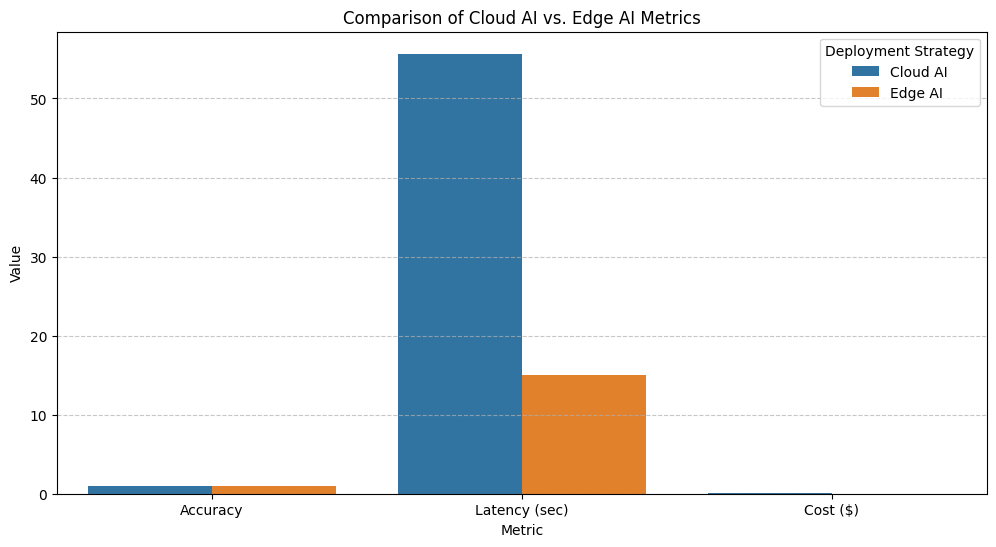

In [ ]:
df_plot = results[results['Metric'].isin(['Accuracy', 'Latency (sec)', 'Cost ($)'])].set_index('Metric').transpose().reset_index()
df_plot = df_plot.rename(columns={'index': 'Deployment Strategy'})
df_plot_melted = df_plot.melt(id_vars='Deployment Strategy', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Deployment Strategy', data=df_plot_melted)
plt.title('Comparison of Cloud AI vs. Edge AI Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(results.to_markdown(index=False))

| Metric        | Cloud AI           | Edge AI                |
|:--------------|:-------------------|:-----------------------|
| Accuracy      | 0.9641255605381166 | 0.97847533632287       |
| Latency (sec) | 55.66247010231018  | 15.033917665481567     |
| Cost ($)      | 0.1115             | 0.01115                |
| Scalability   | High (Auto-scale)  | Limited (Device-bound) |
